Import Required Libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler


Load Data

In [210]:
d1 = pd.read_csv('AXISBANK.NS.csv')
d2 = pd.read_csv('ICICIBANK.NS.csv')
d3 = pd.read_csv('HDFCBANK.NS.csv')
d4 = pd.read_csv('INDUSINDBK.NS.csv')
d5 = pd.read_csv('KOTAKBANK.NS.csv')

Sort and Save Merged Data

In [212]:
merged_data = pd.concat([d1, d2,d3,d4,d5], axis=0)
data = merged_data.sort_values(by="Date", ascending=True) 
data.to_csv("stockprice_dataset.csv",index=False)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-01-01,4.140000,4.195000,4.050000,4.195000,3.364387,892000.0
1,1997-01-02,4.250000,4.295000,4.105000,4.125000,3.308247,996000.0
2,1997-01-03,4.145000,4.195000,4.100000,4.150000,3.328297,496000.0
3,1997-01-06,4.200000,4.275000,4.140000,4.155000,3.332307,612000.0
4,1997-01-07,4.125000,4.235000,4.125000,4.210000,3.376417,964000.0
...,...,...,...,...,...,...,...
6594,2023-03-23,1567.750000,1590.349976,1558.550049,1563.150024,1563.150024,14182089.0
5029,2023-03-23,1028.150024,1046.199951,1014.250000,1018.250000,1018.250000,3703523.0
6072,2023-03-23,847.000000,861.150024,845.099976,848.799988,848.799988,9857892.0
5029,2023-03-23,857.000000,867.450012,852.799988,855.450012,855.450012,17920621.0


Data Overview

In [214]:
data.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [215]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-01-01,4.140,4.195,4.050,4.195,3.364387,892000.0
1,1997-01-02,4.250,4.295,4.105,4.125,3.308247,996000.0
2,1997-01-03,4.145,4.195,4.100,4.150,3.328297,496000.0
3,1997-01-06,4.200,4.275,4.140,4.155,3.332307,612000.0
4,1997-01-07,4.125,4.235,4.125,4.210,3.376417,964000.0


In [216]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6594,2023-03-23,1567.750000,1590.349976,1558.550049,1563.150024,1563.150024,14182089.0
5029,2023-03-23,1028.150024,1046.199951,1014.250000,1018.250000,1018.250000,3703523.0
6072,2023-03-23,847.000000,861.150024,845.099976,848.799988,848.799988,9857892.0
5029,2023-03-23,857.000000,867.450012,852.799988,855.450012,855.450012,17920621.0
5290,2023-03-23,1699.150024,1700.000000,1675.000000,1679.699951,1679.699951,5642151.0


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28019 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       28019 non-null  object 
 1   Open       27966 non-null  float64
 2   High       27966 non-null  float64
 3   Low        27966 non-null  float64
 4   Close      27966 non-null  float64
 5   Adj Close  27966 non-null  float64
 6   Volume     27966 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.7+ MB


In [218]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,27966.000000,27966.000000,27966.000000,27966.000000,27966.000000,2.796600e+04
mean,420.160896,425.496490,414.278417,419.901244,409.428206,7.342708e+06
std,475.825956,480.777912,470.314330,475.580155,473.494092,1.150673e+07
min,2.470000,2.470000,2.400000,2.455000,1.640184,0.000000e+00
25%,61.625000,63.000000,59.700001,61.424089,54.558907,1.166000e+06
50%,230.000000,233.522728,225.638183,229.602501,216.387871,3.456087e+06
75%,618.500015,625.618744,610.425003,618.431229,606.431229,9.046642e+06
max,2200.000000,2253.000000,2176.600098,2210.949951,2209.619629,2.868577e+08


In [219]:
data.nunique()

Date          6595
Open         16099
High         18095
Low          18928
Close        22162
Adj Close    25817
Volume       27483
dtype: int64

In [220]:
data['Date'].value_counts()

Date
2009-11-25    5
2014-04-24    5
2014-05-09    5
2014-05-08    5
2014-05-07    5
             ..
1998-05-12    1
1998-05-13    1
1998-05-14    1
1998-05-15    1
1997-01-01    1
Name: count, Length: 6595, dtype: int64

In [221]:
data.shape

(28019, 7)

In [222]:
data.isnull().sum()

Date          0
Open         53
High         53
Low          53
Close        53
Adj Close    53
Volume       53
dtype: int64

In [223]:
data.isnull().sum().values.sum()

318

In [224]:
data.dropna(inplace=True)
data.isnull().sum().values.sum()

0

In [225]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [226]:
data.shape

(27966, 7)

In [227]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

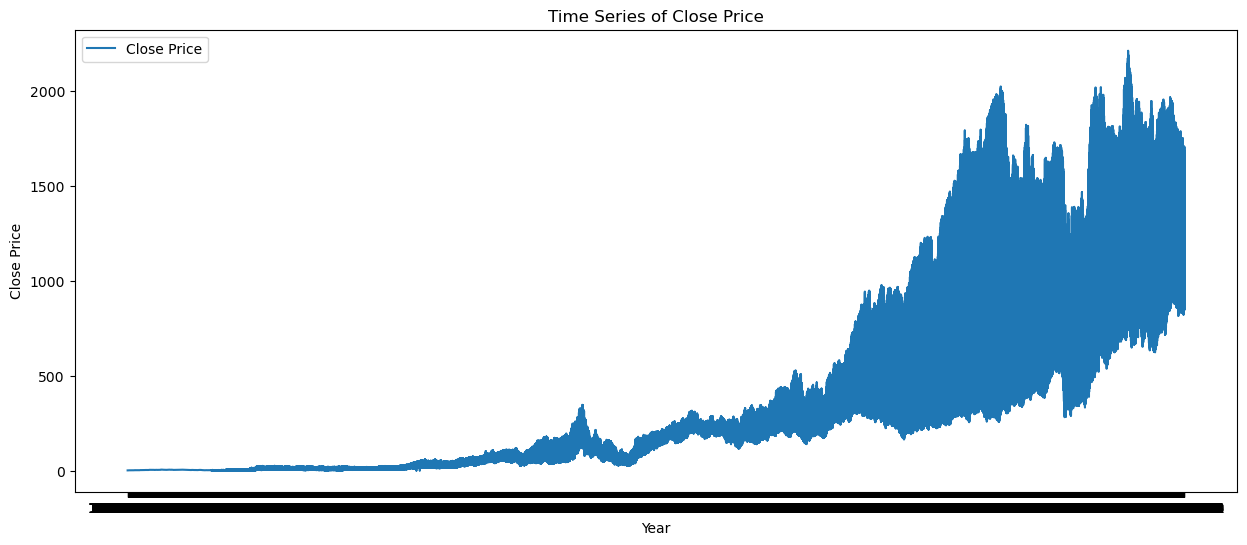

In [228]:
if 'Date' in data.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title("Time Series of Close Price")
    plt.xlabel("Year")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()

Outlier Detection and Removal

In [230]:
num_cols = data.select_dtypes(include=[np.number]).columns

In [231]:
for col in num_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds for acceptable data points
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with values outside of the lower and upper bounds
        cleaned_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [232]:
cleaned_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-01-01,4.140000,4.195000,4.050000,4.195000,3.364387,892000.0
1,1997-01-02,4.250000,4.295000,4.105000,4.125000,3.308247,996000.0
2,1997-01-03,4.145000,4.195000,4.100000,4.150000,3.328297,496000.0
3,1997-01-06,4.200000,4.275000,4.140000,4.155000,3.332307,612000.0
4,1997-01-07,4.125000,4.235000,4.125000,4.210000,3.376417,964000.0
...,...,...,...,...,...,...,...
6594,2023-03-23,1567.750000,1590.349976,1558.550049,1563.150024,1563.150024,14182089.0
5029,2023-03-23,1028.150024,1046.199951,1014.250000,1018.250000,1018.250000,3703523.0
6072,2023-03-23,847.000000,861.150024,845.099976,848.799988,848.799988,9857892.0
5029,2023-03-23,857.000000,867.450012,852.799988,855.450012,855.450012,17920621.0


In [233]:
cleaned_data.shape

(25759, 7)

Visualize Outliers with Boxplots

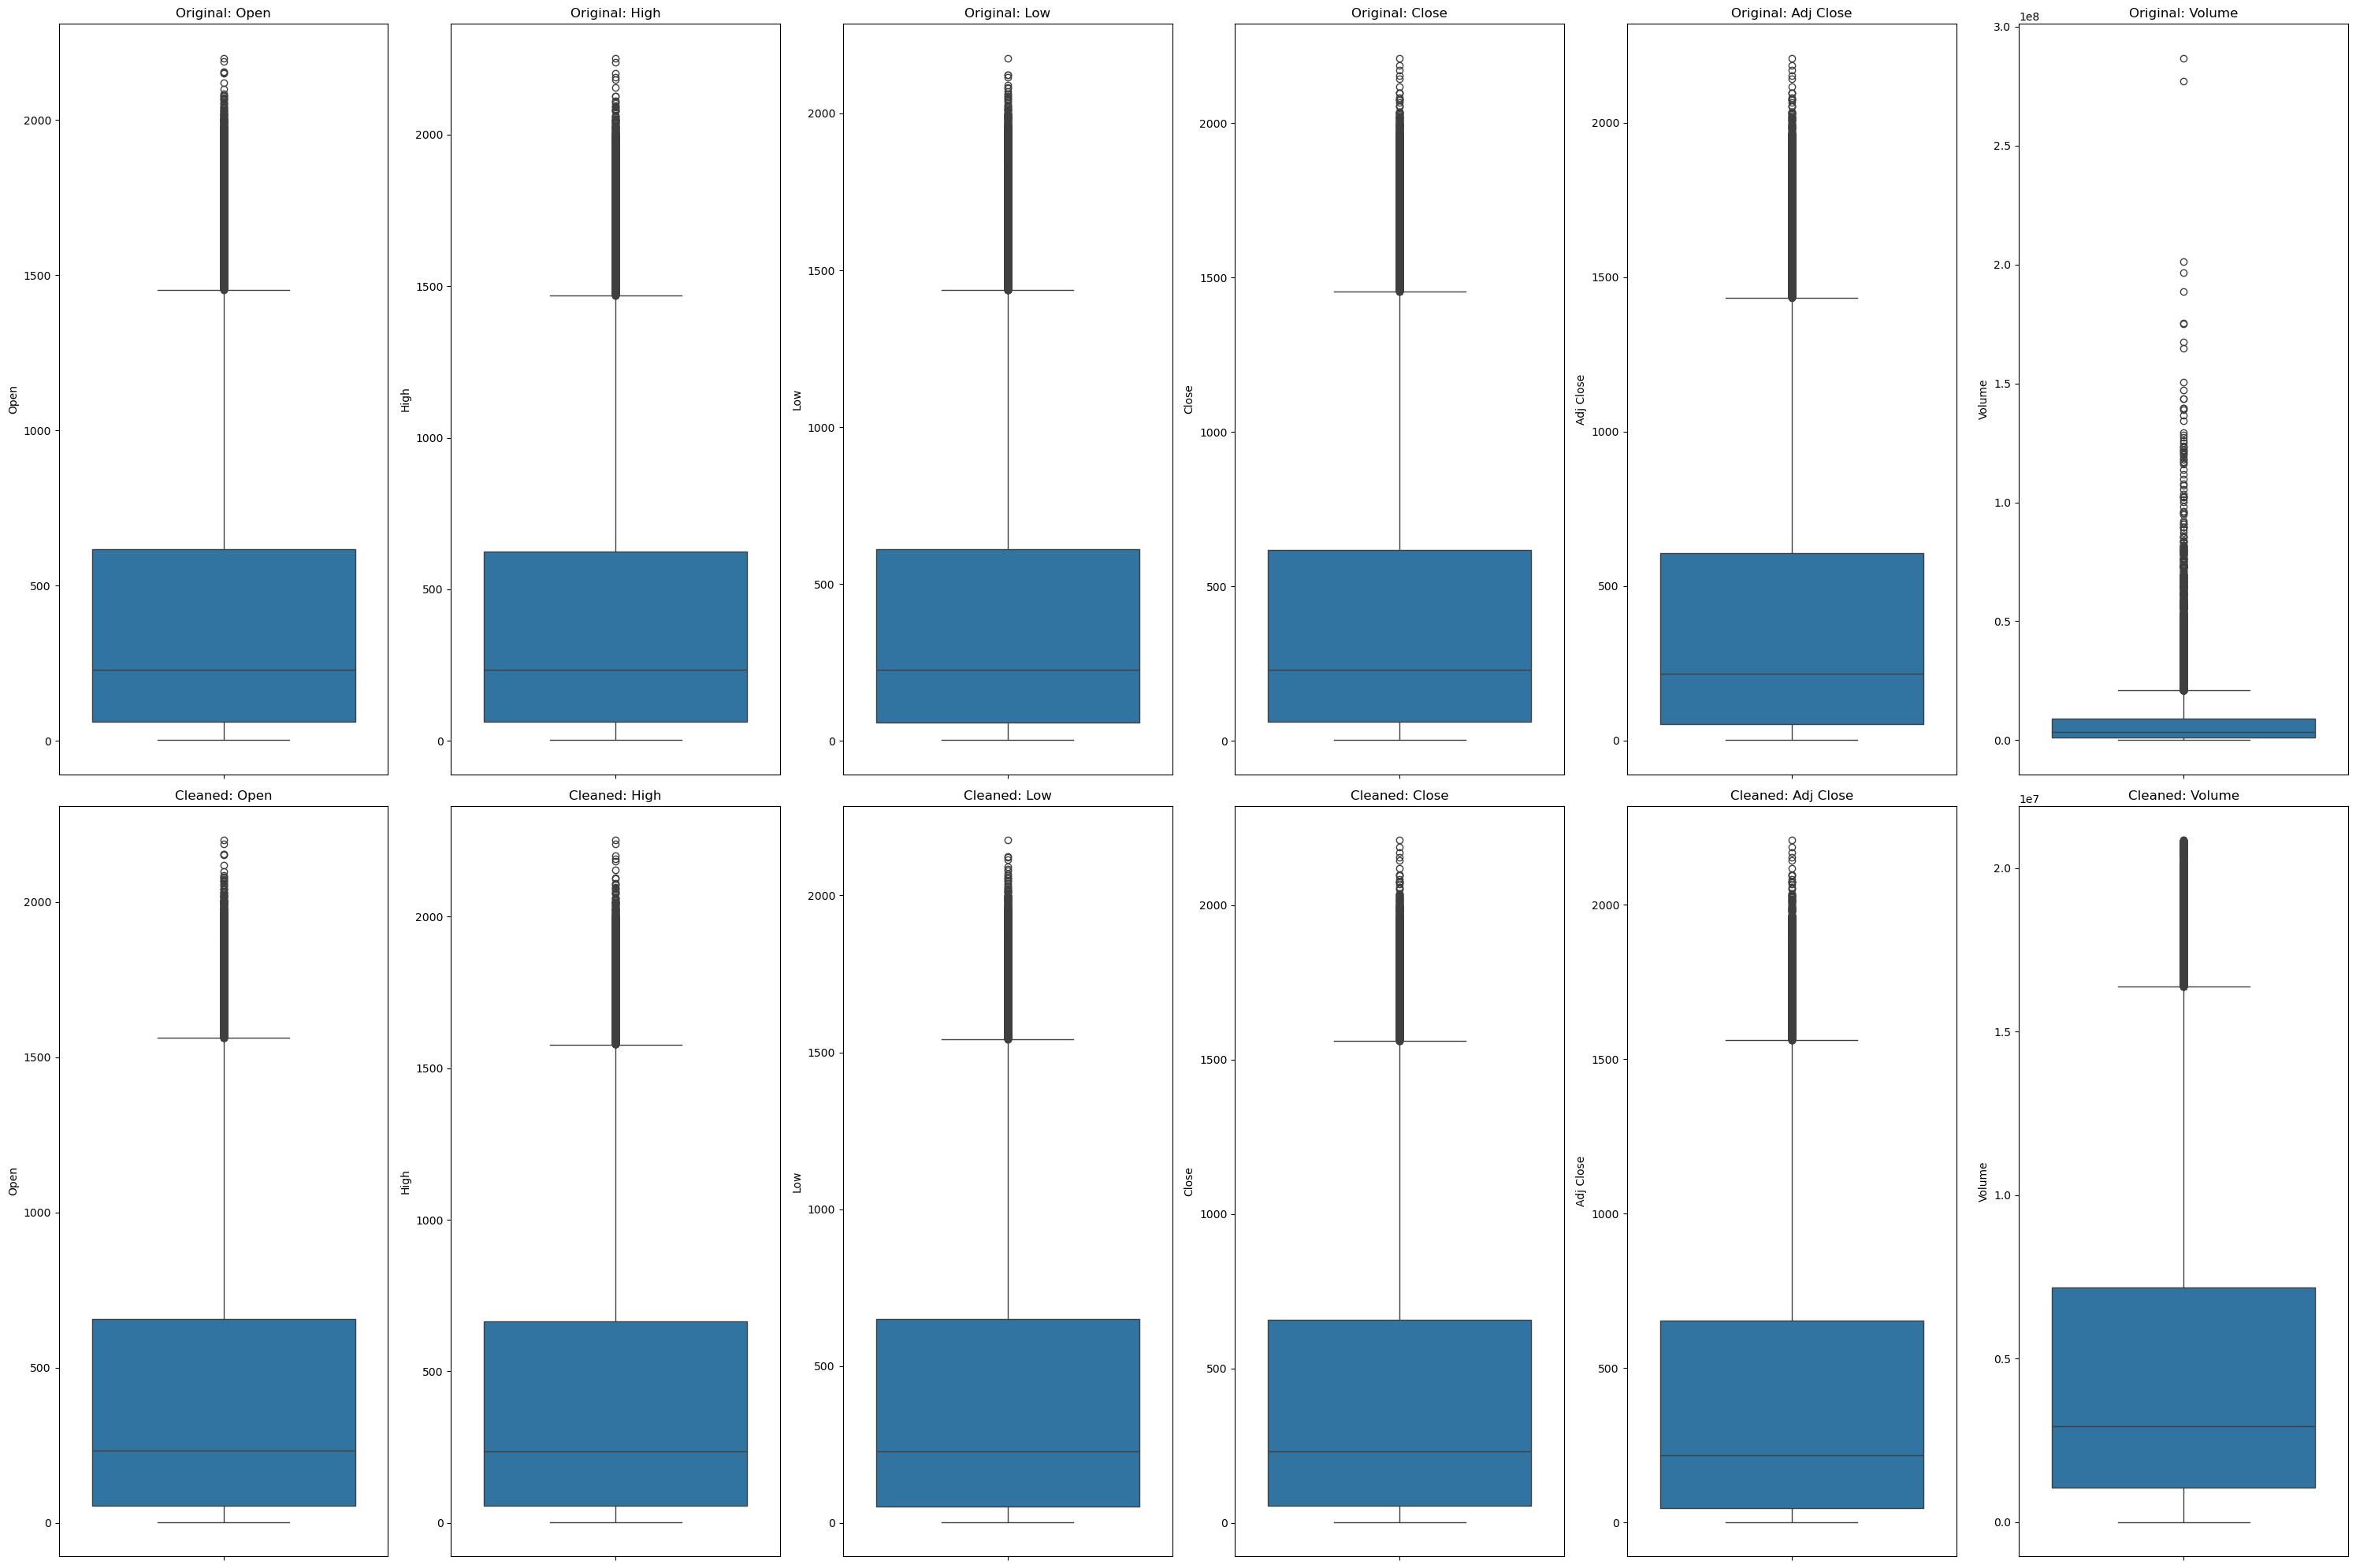

In [235]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns

# 1. Boxplots for Outlier Visualization
plt.figure(figsize=(30, 20))
for i, col in enumerate(num_cols, 1):
    # Original data boxplot
    plt.subplot(2, len(num_cols), i)
    sns.boxplot(y=data[col])
    plt.title(f'Original: {col}')
    
    # Cleaned data boxplot
    plt.subplot(2, len(num_cols), i + len(num_cols))
    sns.boxplot(y=cleaned_data[col])
    plt.title(f'Cleaned: {col}')
    
plt.tight_layout()
plt.show() 

In [236]:
# Calculate the correlation matrix
correlation_matrix = cleaned_data.corr(numeric_only=True)

# Display the entire correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999896  0.999875  0.999786   0.999594  0.062413
High       0.999896  1.000000  0.999837  0.999907   0.999719  0.063776
Low        0.999875  0.999837  1.000000  0.999894   0.999690  0.061058
Close      0.999786  0.999907  0.999894  1.000000   0.999803  0.062486
Adj Close  0.999594  0.999719  0.999690  0.999803   1.000000  0.059391
Volume     0.062413  0.063776  0.061058  0.062486   0.059391  1.000000


In [237]:
# Display correlation of all features with the 'Close' column
close_correlation = correlation_matrix['Close'].sort_values(ascending=False)
print("\nCorrelation with Close:")
print(close_correlation)



Correlation with Close:
Close        1.000000
High         0.999907
Low          0.999894
Adj Close    0.999803
Open         0.999786
Volume       0.062486
Name: Close, dtype: float64


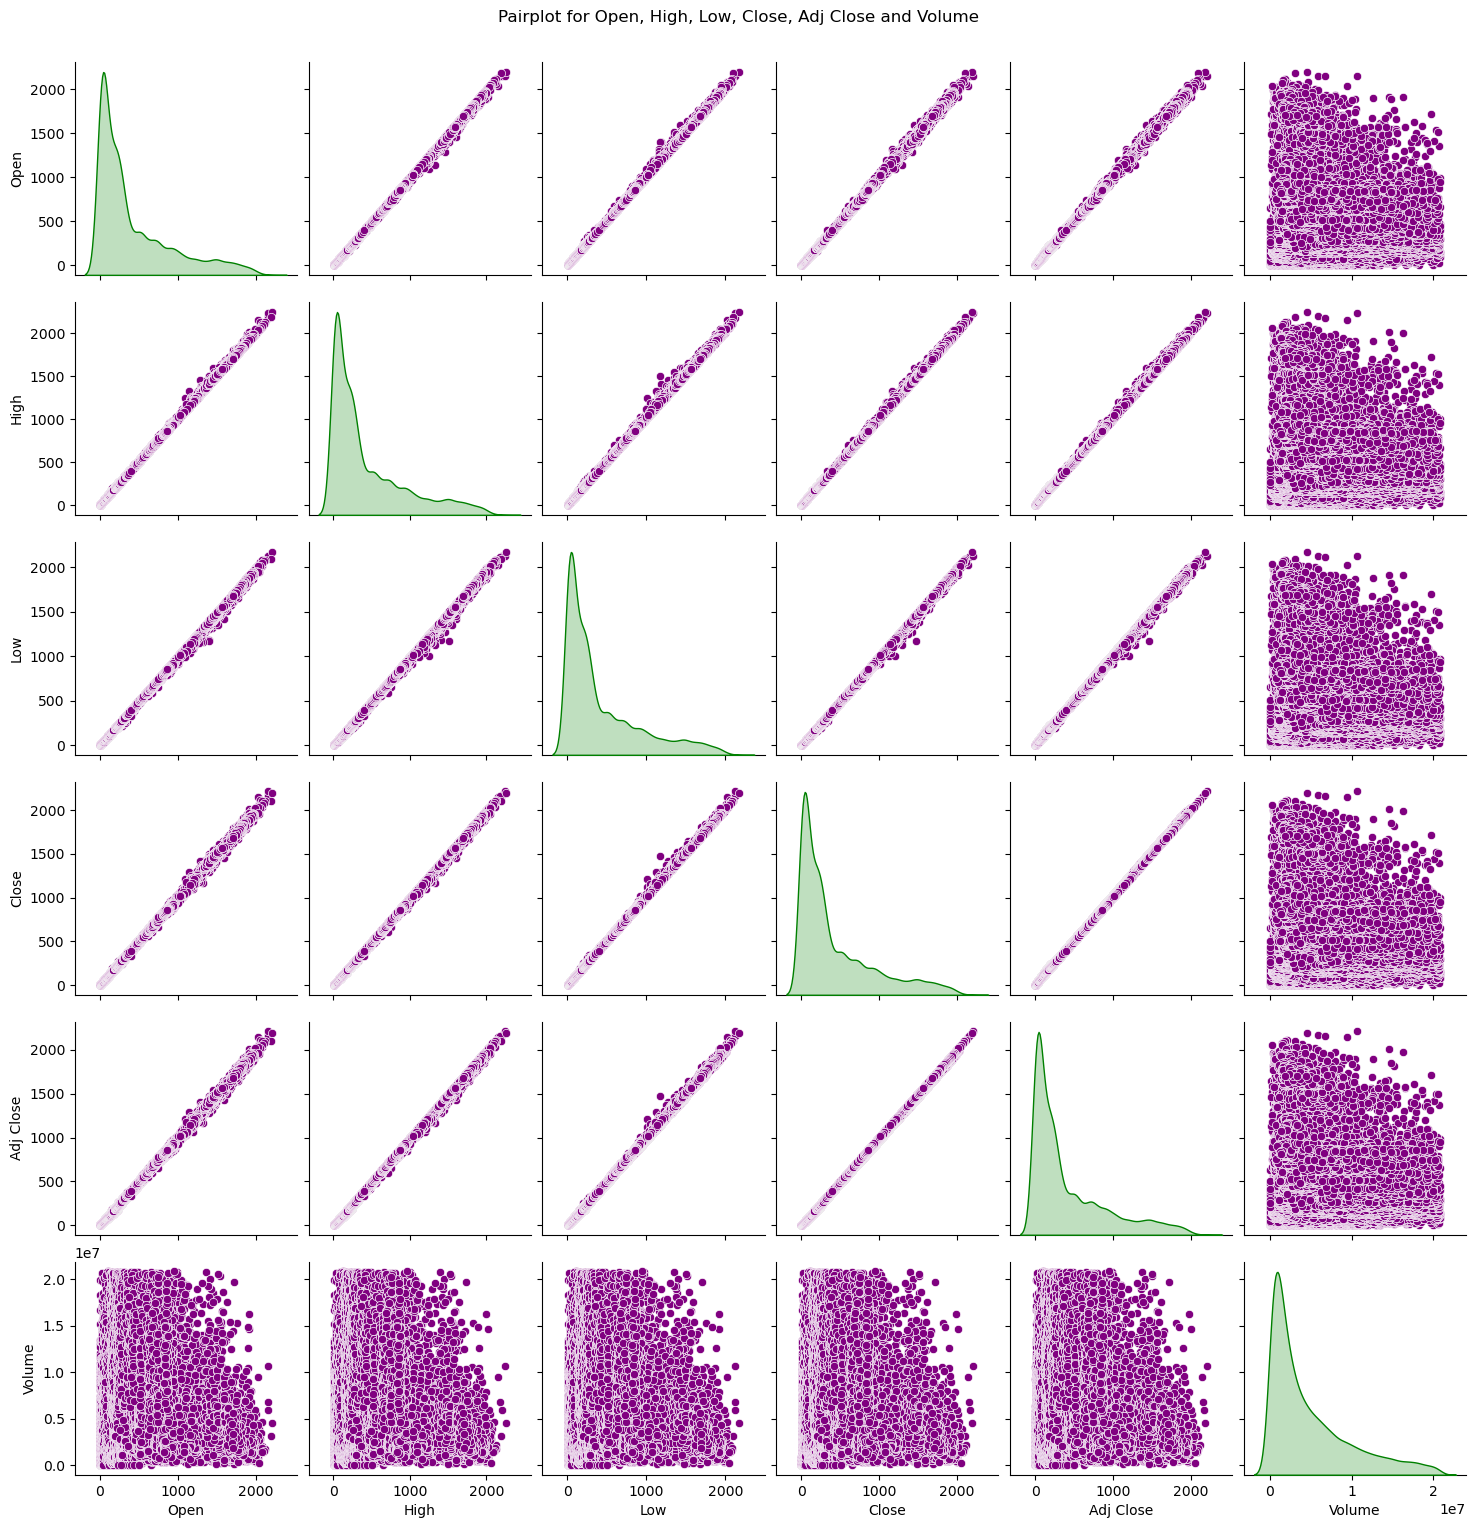

In [238]:
# Select a subset of columns for analysis
subset_data = cleaned_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Create the pair plot
pairplot = sns.pairplot(subset_data, diag_kind='kde', plot_kws={'color': 'purple'}, diag_kws={'color': 'green'})
pairplot.fig.suptitle('Pairplot for Open, High, Low, Close, Adj Close and Volume', y=1.02)

plt.show()

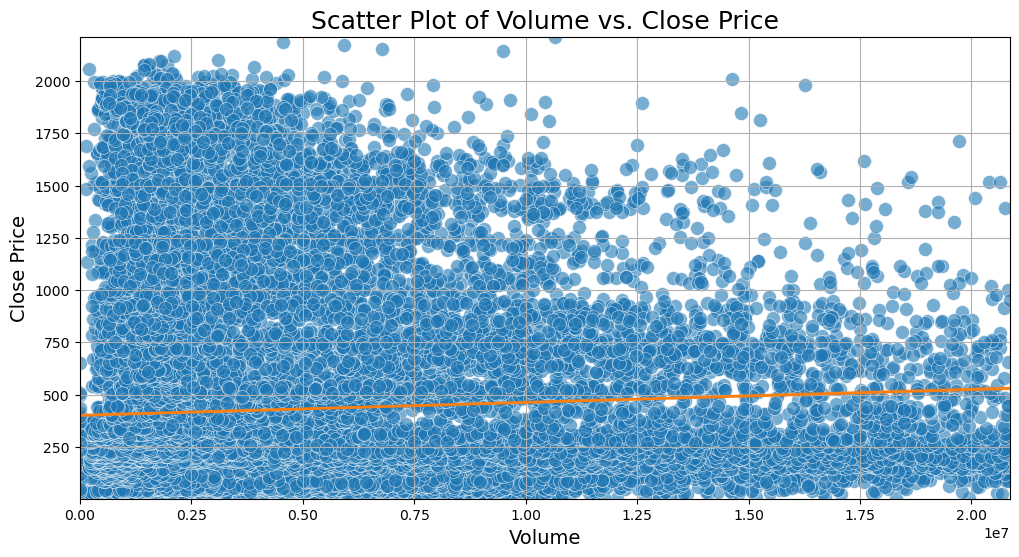

In [239]:
# Define a custom color palette
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Blue, Orange, Green, Red, Purple

# 5. Scatter Plots between Volume and Close (or other pairs)
plt.figure(figsize=(12, 6))

# Scatter plot with the first color in the custom palette
scatter = sns.scatterplot(data=subset_data, x="Volume", y="Close", alpha=0.6, s=100, edgecolor='w', linewidth=0.5, color=custom_colors[0])

# Add a regression line in a contrasting color (e.g., orange)
sns.regplot(data=subset_data, x="Volume", y="Close", scatter=False, color=custom_colors[1], line_kws={"linewidth": 2})

# Title and labels with increased font sizes
plt.title("Scatter Plot of Volume vs. Close Price", fontsize=18)
plt.xlabel("Volume", fontsize=14)
plt.ylabel("Close Price", fontsize=14)

# Add grid lines for better visibility
plt.grid(True)

# Set limits (optional, adjust as necessary based on your data)
plt.xlim(subset_data["Volume"].min() - 1, subset_data["Volume"].max() + 1)
plt.ylim(subset_data["Close"].min() - 1, subset_data["Close"].max() + 1)

plt.show()


In [240]:
cleaned_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-01-01,4.140000,4.195000,4.050000,4.195000,3.364387,892000.0
1,1997-01-02,4.250000,4.295000,4.105000,4.125000,3.308247,996000.0
2,1997-01-03,4.145000,4.195000,4.100000,4.150000,3.328297,496000.0
3,1997-01-06,4.200000,4.275000,4.140000,4.155000,3.332307,612000.0
4,1997-01-07,4.125000,4.235000,4.125000,4.210000,3.376417,964000.0
...,...,...,...,...,...,...,...
6594,2023-03-23,1567.750000,1590.349976,1558.550049,1563.150024,1563.150024,14182089.0
5029,2023-03-23,1028.150024,1046.199951,1014.250000,1018.250000,1018.250000,3703523.0
6072,2023-03-23,847.000000,861.150024,845.099976,848.799988,848.799988,9857892.0
5029,2023-03-23,857.000000,867.450012,852.799988,855.450012,855.450012,17920621.0


Feature Engineering

In [242]:
import pandas as pd

# Create a copy of cleaned_data to avoid SettingWithCopyWarning
cleaned_data = cleaned_data.copy()

# Check if 'Date' column exists in cleaned_data
if 'Date' not in cleaned_data.columns:
    print("The 'Date' column is missing.")
else:
    # Convert 'Date' to datetime format and check for errors
    cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')
    
    # Check for any rows where 'Date' conversion resulted in NaT (Not a Time, indicating failed conversion)
    if cleaned_data['Date'].isna().any():
        print("Warning: Some dates could not be converted and are set as NaT. Consider handling them.")
        # Optionally, you can drop rows with NaT in 'Date' like so:
        cleaned_data = cleaned_data.dropna(subset=['Date'])

    # Extract useful features from the Date column if Date conversion was successful
    cleaned_data['Day_of_Week'] = cleaned_data['Date'].dt.dayofweek  # Monday=0, Sunday=6
    cleaned_data['Month'] = cleaned_data['Date'].dt.month            # Month as a number (1-12)
    cleaned_data['Quarter'] = cleaned_data['Date'].dt.quarter        # Quarter (1-4)
    cleaned_data['Year'] = cleaned_data['Date'].dt.year              # Year (useful if spanning multiple years)

    # Drop the original Date column
    cleaned_data.drop(columns=['Date'], inplace=True)

# Calculate additional columns for price change, high-low difference, and daily return
cleaned_data['Price_Change'] = cleaned_data['Close'] - cleaned_data['Open']  # Daily price change
cleaned_data['High_Low_Diff'] = cleaned_data['High'] - cleaned_data['Low']   # Daily high-low difference
cleaned_data['Return'] = cleaned_data['Close'].pct_change()                  # Daily return


In [243]:
cleaned_data

,Open,High,Low,Close,Adj Close,Volume,Day_of_Week,Month,Quarter,Year,Price_Change,High_Low_Diff,Return
0,4.140000,4.195000,4.050000,4.195000,3.364387,892000.0,2,1,1,1997,0.055000,0.145000,NaN
1,4.250000,4.295000,4.105000,4.125000,3.308247,996000.0,3,1,1,1997,-0.125000,0.190000,-0.016687
2,4.145000,4.195000,4.100000,4.150000,3.328297,496000.0,4,1,1,1997,0.005000,0.095000,0.006061
3,4.200000,4.275000,4.140000,4.155000,3.332307,612000.0,0,1,1,1997,-0.045000,0.135000,0.001205
4,4.125000,4.235000,4.125000,4.210000,3.376417,964000.0,1,1,1,1997,0.085000,0.110000,0.013237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,1567.750000,1590.349976,1558.550049,1563.150024,1563.150024,14182089.0,3,3,1,2023,-4.599976,31.799927,-0.008028
5029,1028.150024,1046.199951,1014.250000,1018.250000,1018.250000,3703523.0,3,3,1,2023,-9.900024,31.949951,-0.348591
6072,847.000000,861.150024,845.099976,848.799988,848.799988,9857892.0,3,3,1,2023,1.799988,16.050048,-0.166413
5029,857.000000,867.450012,852.799988,855.450012,855.450012,17920621.0,3,3,1,2023,-1.549988,14.650024,0.007835


In [244]:
cleaned_data = cleaned_data.dropna()
print(cleaned_data.shape)


(25758, 13)



Selected features based on correlation threshold: ['Open', 'High', 'Low', 'Adj Close', 'Year']


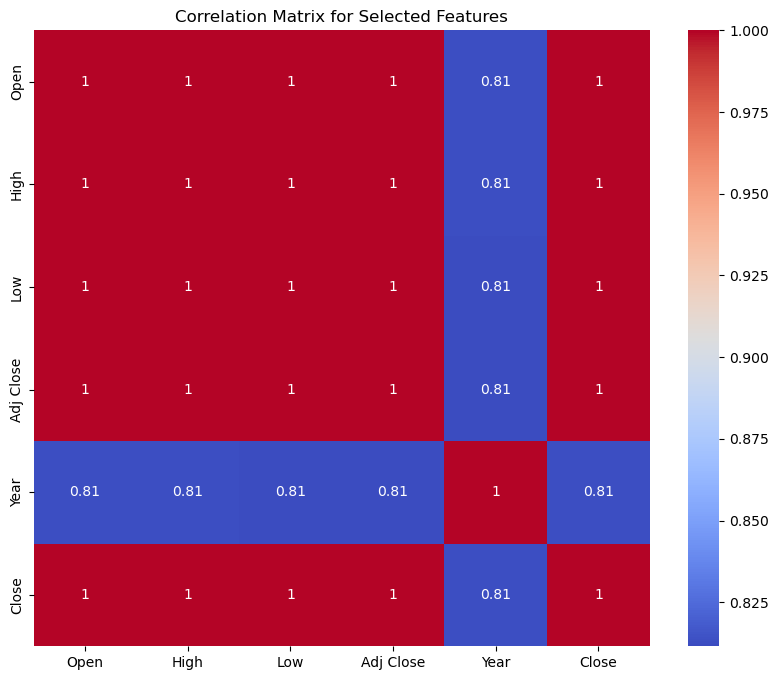

Selected features shape: (25758, 5)
Target variable shape: (25758,)


In [245]:
target = 'Close'  
correlations_with_target = cleaned_data.corr()[target]  # Compute correlation with the target


# Step 4: Select features based on correlation threshold
correlation_threshold = 0.8  
selected_features = correlations_with_target[correlations_with_target.abs() >= correlation_threshold].index.tolist()

# Remove the target variable itself from the selected features
selected_features.remove(target)
print("\nSelected features based on correlation threshold:", selected_features)

# Create a subset of the data with only the selected features and the target
data_selected = cleaned_data[selected_features + [target]]

# Optional: Visualize correlations among selected features
plt.figure(figsize=(10, 8))
sns.heatmap(data_selected.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Selected Features")
plt.show()

# Step 5: Separate features and target for model training
X = data_selected[selected_features]  # Selected features as input
y = data_selected[target]  # Target variable


print("Selected features shape:", X.shape)
print("Target variable shape:", y.shape)

In [246]:
# Step 4: Scaling
#numerical_cols = data_selected.select_dtypes(include=['float64', 'int64']).columns
#scaler = MinMaxScaler()

# Use .loc to avoid SettingWithCopyWarning
#data_selected.loc[:, numerical_cols] = scaler.fit_transform(data_selected[numerical_cols])



In [247]:
# Check scaled data (optional)
#print("Scaled Features:")
#print(data_selected.head())

In [249]:
# Step 5: Train-Test Split
X = data_selected[selected_features]
y = data_selected[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [250]:
X_train

,Open,High,Low,Adj Close,Year
5141,1839.000000,1912.000000,1832.000000,1904.500000,2022
5991,1207.500000,1227.400024,1205.900024,1204.668823,2020
4659,1343.000000,1350.250000,1313.099976,1324.694336,2020
5138,780.799988,789.000000,763.349976,768.574158,2019
1701,118.800003,118.900002,114.099998,107.665161,2009
...,...,...,...,...,...
5616,1122.449951,1131.500000,1118.474976,1101.654419,2019
1553,35.889999,36.349998,34.799999,30.315805,2004
691,8.825000,9.185000,8.800000,7.461442,1999
3871,303.959991,303.959991,303.959991,291.978912,2014


In [251]:
y_train

5141    1904.500000
5991    1223.949951
4659    1326.150024
5138     770.700012
1701     115.949997
           ...     
5616    1128.750000
1553      35.029999
691        8.875000
3871     303.959991
5641     748.299988
Name: Close, Length: 20606, dtype: float64

In [252]:
X_test

,Open,High,Low,Adj Close,Year
2566,112.300003,113.400002,109.809998,98.605392,2006
1284,104.224998,106.574997,102.275002,101.643250,2007
1028,54.900002,57.700001,54.500000,50.216599,2007
379,45.454544,46.836365,44.963634,34.842396,2004
1062,61.450001,61.450001,59.037498,58.755039,2006
...,...,...,...,...,...
6076,1545.000000,1564.199951,1533.000000,1514.854126,2021
3391,1190.349976,1206.800049,1188.000000,1157.379395,2016
3932,275.500000,276.200012,269.899994,250.661499,2012
901,89.181816,90.000000,88.181816,71.583405,2006


In [253]:
y_test

2566     110.035004
1284     102.987503
1028      56.049999
379       45.927273
1062      59.674999
           ...     
6076    1539.099976
3391    1192.400024
3932     270.875000
901       88.718178
4441    1588.599976
Name: Close, Length: 5152, dtype: float64

In [254]:
# Step 2: Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
# Step 3: Train the model
random_forest_model.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = random_forest_model.predict(X_test)




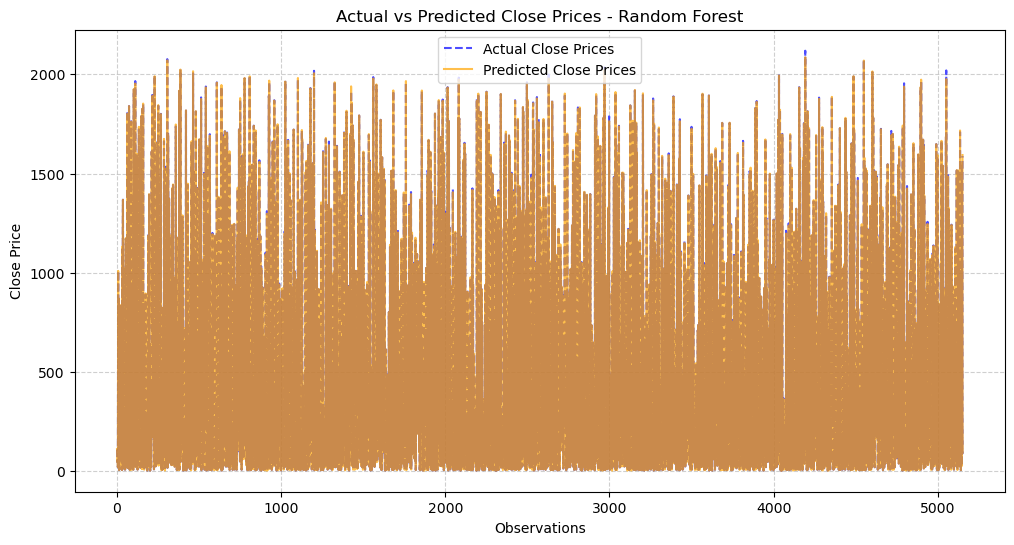

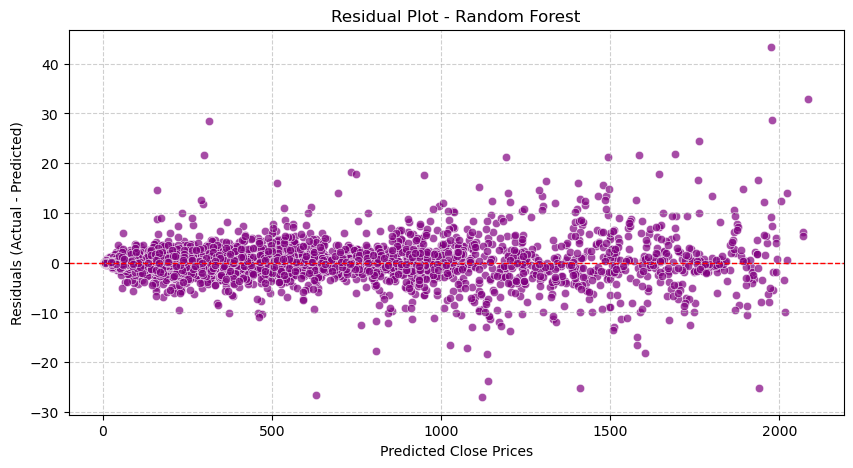

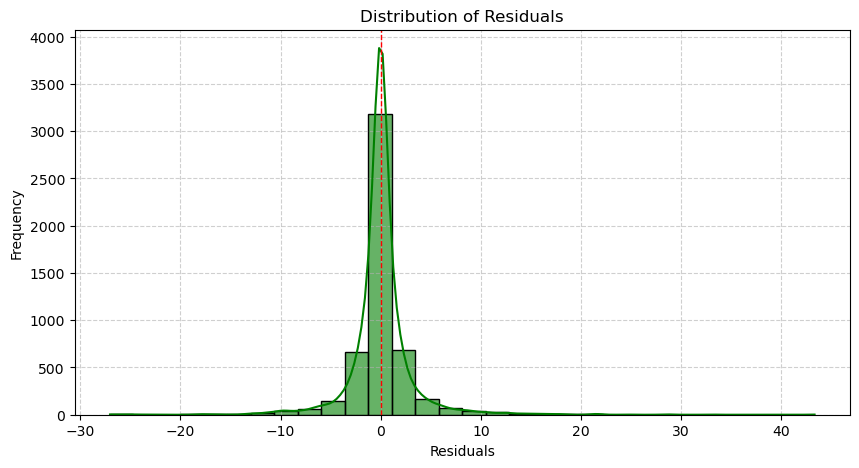

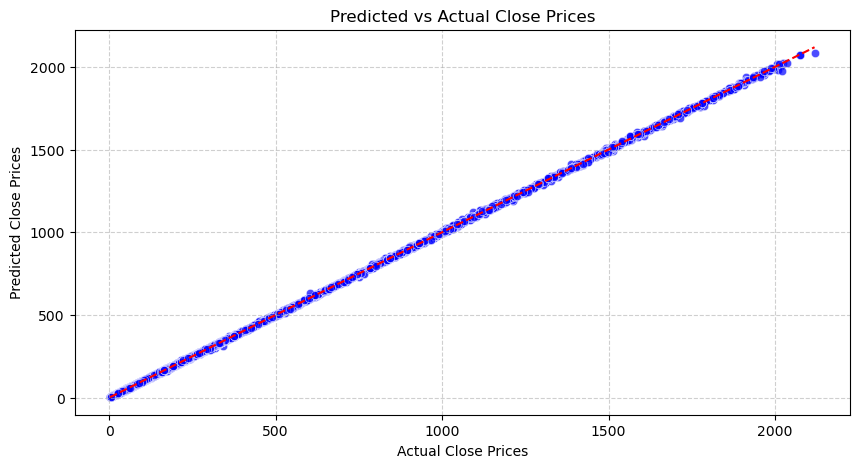

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization 1: Predicted vs Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Prices', color='blue', linestyle='dashed', alpha=0.7)
plt.plot(y_pred, label='Predicted Close Prices', color='orange', alpha=0.7)
plt.title("Actual vs Predicted Close Prices - Random Forest")
plt.xlabel("Observations")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualization 2: Residuals
residuals = y_test.values - y_pred
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot - Random Forest")
plt.xlabel("Predicted Close Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualization 3: Distribution of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='green', alpha=0.6)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualization 4: Scatter Plot of Predicted vs Actual
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test.values, y=y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title("Predicted vs Actual Close Prices")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [256]:

# Calculate performance metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100



In [257]:
# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")
print(f"MAPE: {mape}%")
print(f"Explained Variance Score: {explained_variance}")


RMSE: 3.15327149721806
MAE: 1.6361551736218927
R² Score: 0.999957247242951
MAPE: 0.6190659886901156%
Explained Variance Score: 0.9999572537555514


In [318]:

# Example selected features used during training (modify based on your actual training setup)
selected_features = ['Open', 'High', 'Low', 'Adj Close', 'Year']  # Ensure this matches your training data

# Sample input data for prediction
sample_data = {
    'Open': [1699.150024],
    'High': [1700.0],
    'Low': [1675.0],
    'Adj Close': [1679.699951],
    'Year': [2023]
}

# Create a DataFrame for the sample data
sample_df = pd.DataFrame(sample_data, columns=selected_features)

# If you used scaling during training, make sure to scale the data
# Assuming 'scaler' was fitted on the training data
#sample_scaled = scaler.transform(sample_df)

# Assuming 'random_forest_model' is your trained model
predicted_prices = random_forest_model.predict(sample_df)

# Output the predicted Close prices
print("Predicted Close Prices:", predicted_prices)


Predicted Close Prices: [1681.45046254]
